In [1]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
# print(df.head())

X = df.drop('target', axis = 1)
Y = df['target']

print(X,Y)


          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [23]:
from sklearn.datasets import make_regression
import numpy as np

In [6]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

ValueError: x and y must be the same size

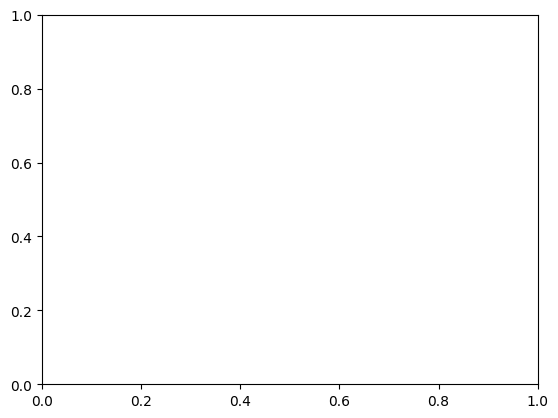

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
reg.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [28]:
reg.intercept_

np.float64(151.34560453985995)

In [29]:
r2_score(y_test, reg.predict(X_test))

0.4526027629719195

152.1334841628959 [  48.24658226  -32.92726854  258.93018438  180.81212084   36.22954144
   10.73130635 -148.31320668  133.89614088  229.53250321  128.55950125]

In [7]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

NameError: name 'y' is not defined

In [ ]:
class Batch_GRD:
    def __init__(self,learning_rate=0.1,epochs=10000):
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.coefficients = None
      self.intercept = None

    def fit(self,X_train,y_train):
      self.intercept = 0
      self.coefficients = np.zeros(X_train.shape[1])

      for _ in range(self.epochs):
        y_hat = np.dot(X_train,self.coefficients) + self.intercept
        loss_slope_intercept = -2 * np.mean(y_train - y_hat)
        self.intercept = self.intercept - self.learning_rate * loss_slope_intercept
        loss_slope_coefficients = -2 * np.dot((y_train - y_hat),X_train) / X_train.shape[0]
        self.coefficients = self.coefficients - self.learning_rate * loss_slope_coefficients
      print(self.intercept,self.coefficients)

    def predict(self,X_test):
      return np.dot(X_test,self.coefficients) + self.intercept




In [49]:
model = Batch_GRD()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print(y_hat)

151.30376541110277 [  39.94505394 -236.73538528  550.2820843   340.35166418  -97.98399999
 -127.0911473  -216.01675651  148.73842839  411.06396702   71.8260715 ]
[140.57663699 181.02248209 140.02760728 293.77123945 121.15290403
  94.17239531 256.50037496 188.613833    83.87874454 111.74963041
  95.11912653 160.70476998  65.19652851 206.34021125  99.92916681
 133.41461944 222.49599615 246.5763916  196.58284277 214.09110627
 206.73643204  88.20288715  73.00368035 188.30330598 156.6060865
 162.88918249 189.63149113 176.46535593  50.18949427 111.55074093
 181.17577199  92.47758369 131.41870737 180.61299212 173.00098526
 191.09006536 122.92281981 118.41576526 146.35684666  60.50231134
  76.17804494 108.20321727 160.87480252 149.08015675 175.42644035
  65.32309335  80.18295765 106.16930357  59.45456752 159.7186029
 157.3039405   65.63615109 114.42632574 108.29645653 168.62835148
 159.89355326  95.0789791  206.88569733 117.30660876  67.93174966
 184.18620282 201.69840523 141.91029933 106.0816

In [50]:
r2_score(y_test, y_hat)

0.4563758987339841